In [3]:
!pip3 install gymnasium numpy matplotlib tqdm seaborn pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 14.8 MB/s eta 0:00:00


## ECEN 743 ASSIGNMENT 3
#  AAKASH DESHMANE
#  133008022

The Value function is [0.06889059 0.06141431 0.07440957 0.05580711 0.09185426 0.
 0.1122081  0.         0.14543612 0.2474968  0.29961748 0.
 0.         0.37993579 0.63902009 0.        ]
The Optimal policy is [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]
Value Function [0.50298579 0.25235511 0.80329704 0.69483129 0.07256636 0.7176372
 0.22026238 0.92981461 0.61806109 0.32832657 0.20576062 0.35616985
 0.12486129 0.06125823 0.40449088 0.17925338]
Policy [2 2 2 0 0 1 2 0 1 1 1 2 0 2 1 2]


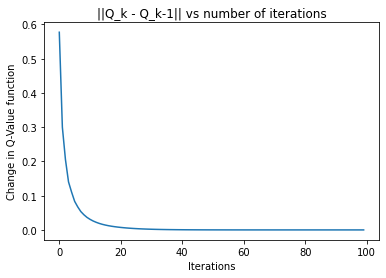

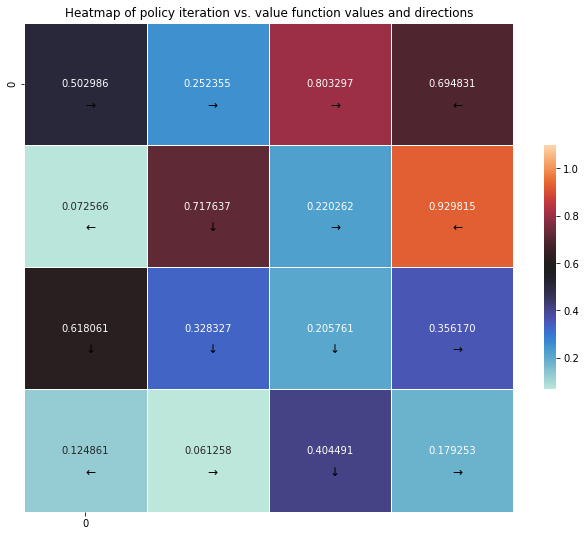

Value function of [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0] is [6.88909049e-02 6.14145715e-02 7.44097620e-02 5.58073215e-02
 9.18545399e-02 1.23358114e-16 1.12208206e-01 0.00000000e+00
 1.45436355e-01 2.47496955e-01 2.99617593e-01 0.00000000e+00
 0.00000000e+00 3.79935901e-01 6.39020148e-01 0.00000000e+00]
Value function of random policy [0 0 1 2 1 2 1 3 1 0 1 2 1 1 1 0] is [ 15.47355096  44.4735126   28.35091488 -42.52637232  -5.15785032
   0.           9.86574092   0.         -11.17534236  -4.87130308
   2.26744409   0.           0.           1.92278185   3.71750611
   0.        ]
Value function of [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0] is [0.06889058 0.0614143  0.07440956 0.0558071  0.09185425 0.
 0.1122081  0.         0.14543612 0.2474968  0.29961748 0.
 0.         0.37993579 0.63902009 0.        ]
Value function of random policy [0 0 1 2 1 2 1 3 1 0 1 2 1 1 1 0] is [0.01185597 0.00508113 0.01959811 0.         0.01580796 0.
 0.0602459  0.         0.03688525 0.08606557 0.20081967 0.
 0.         

Text(0.5, 0, 'Iterations')

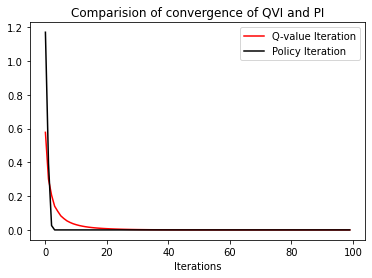

In [4]:
## ECEN 743 ASSIGNMENT 3
#  AAKASH DESHMANE
#  133008022
#_________________________________________________________________________________________________________________________________________________________

# PLANNING

# Q-VALUE ITERATION

import gymnasium as gym
import random 
import numpy as np
import matplotlib.pyplot as plt

# Initializing environment, states and actions
e = gym.make('FrozenLake-v1', desc=None, map_name='4x4', is_slippery=True) 
state_dim = 16
action_dim = 4
gamma = 0.9
e.reset()
q_value = np.zeros((state_dim, action_dim))
reward = np.zeros(state_dim)
reward[15] = 1.0
q = np.zeros(action_dim)
value_f = q_value.max(axis=1)
iterations = 100
random_policy = np.random.randint(action_dim, size=(state_dim))

#_________________________________________________________________________________________________________________________________________________________
# 1.(a) Value function and optimal policy
episode_QVI = [np.zeros((state_dim, action_dim))]*iterations
terminality = False
for i in range(iterations):
    current_value = np.zeros((state_dim, action_dim))
    value_f = np.zeros(state_dim)
    for state in range(state_dim):
        q = np.zeros(4)
        for action in range(action_dim):
            data = e.P[state][action]        
            for j in range(len(data)):
                q[action] += (data[j][2] + gamma*np.max(q_value[data[j][1]]))*data[j][0] 
            current_value[state][action] = q[action] 
            value_f[state] = np.max(q)
        for action_iterate in range(action_dim):
            current_value[state][action_iterate] = q[action_iterate]       
    episode_QVI[i] = np.linalg.norm(current_value - q_value)
    q_value = current_value 
    value_f = q_value.max(axis=1) 

policy = np.argmax(q_value, axis=1)
# But in Q value iteration, this is the optimal policy
optimal_policy = policy

print(f'The Value function is {value_f}')
print (f'The Optimal policy is {optimal_policy}')
e.close()

#_________________________________________________________________________________________________________________________________________________________
# 1.(b) 
# Plot U_k = ||Q_k - Q_k-1|| vs number of iterations
plt.plot(episode_QVI)
plt.title("||Q_k - Q_k-1|| vs number of iterations")
plt.xlabel('Iterations')
plt.ylabel("Change in Q-Value function")

#_________________________________________________________________________________________________________________________________________________________
# 1.(c) 
# Plot of Heat Maps using fancy_visual function
# Visualization code
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration vs. value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

test_value = np.random.rand(16) #Random Value Function (only for plotting)
test_policy = np.random.randint(0,3,16) #Random Policy (only for plotting)
fancy_visual(test_value,test_policy)

#_________________________________________________________________________________________________________________________________________________________
#_________________________________________________________________________________________________________________________________________________________
## 2. POLICY EVALUATION

# 2.(a) - By solving a linear systems of equations
reward_array = np.zeros(state_dim) 
v = np.zeros((state_dim, state_dim))
I = np.identity(state_dim)

def policy_eval(policy):
    for i in range(len(policy)):
        r = 0
        for p, next_state, reward, terminality in e.P[i][policy[i]]:
            r += reward*p
            v[i][next_state] += gamma*p 
        reward_array[i] = r    
    inv = np.linalg.inv(I - v)
    v_pi = np.matmul(inv,reward_array)
    return v_pi
print(f'Value function of {optimal_policy} is {policy_eval(optimal_policy)}')
print(f'Value function of random policy {random_policy} is {policy_eval(random_policy)}')

#_________________________________________________________________________________________________________________________________________________________
# 2.(b) (By iterative approach)
def policy_eval_iteration(policy): 
    v_pi = np.zeros(state_dim)
    for i in range(iterations):    
        v_pi_update = np.zeros(state_dim)
        for state in range(len(policy)):
            for p, next_state, reward, terminality in e.P[state][policy[state]]:
                v_pi_update[state] += (reward + gamma*v_pi[next_state])*p 
        v_pi = v_pi_update
    return v_pi
print(f'Value function of {optimal_policy} is {policy_eval_iteration(optimal_policy)}')
print(f'Value function of random policy {random_policy} is {policy_eval_iteration(random_policy)}')

#_________________________________________________________________________________________________________________________________________________________
#_________________________________________________________________________________________________________________________________________________________
## 3. POLICY ITERATION

# 3.(a) Value Function and Optimal Policy

episode_PI = [np.zeros((state_dim, action_dim))]*iterations

def policy_iteration(p):
    Q = np.zeros((state_dim, action_dim))
    for i in range(iterations):
        current_value = np.zeros((state_dim, action_dim))

        # Policy Evaluation
        v_pi = policy_eval_iteration(p)

        # Policy Improvement
        for state in range(state_dim):
            value_f = v_pi
            q = np.zeros(4)
            for action in range(action_dim):
                for p, next_state, reward, terminality in e.P[state][action]:
                    q[action] += (reward + gamma*(value_f[next_state]))*p 
                current_value[state][action] = q[action] 
                
            for action_iterate in range(action_dim): 
              current_value[state][action_iterate] = q[action_iterate]      
        episode_PI[i] = np.linalg.norm(current_value - Q)
        Q = current_value 
        policy = np.argmax(Q, axis=1)
        p = policy
    return p
print(f'The optimal policy by policy iteration is {policy_iteration(random_policy)} and its value function is {value_f}')

#_________________________________________________________________________________________________________________________________________________________
# 3.(b) Compare the QVI and PI

plt.plot(episode_QVI, color='r', label='Q-value Iteration')
plt.plot(episode_PI, color='k', label='Policy Iteration')
plt.legend()
plt.title("Comparision of convergence of QVI and PI")
plt.xlabel('Iterations')
#_________________________________________________________________________________________________________________________________________________________

1.(b) As we can see from the comparison graph, Policy Iteration has a lesser computational complexity as it converges quicker than Value Iteration. Hence, it is better in performance than Value Iteration.

1.(c) Yes, Learning optimal policy is possible because we eventually converge to its value.

Text(0, 0.5, 'L2 norm of change in Q-Value function')

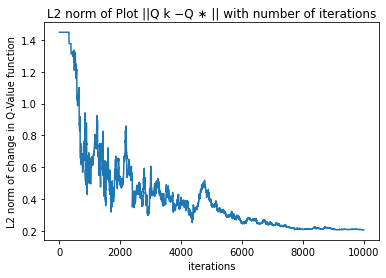

In [37]:
#_________________________________________________________________________________________________________________________________________________________
# LEARNING 
# 1.(a) TABULAR Q LEARNING

import math
e.reset()
max_step = 20
iterations = 10000
Q = np.zeros((state_dim,action_dim))
q_star = current_value


def epsilon_action(epsilon):
    x = np.random.uniform(0, 1)
    if x < epsilon:
        return True
    return False

greedy_e_array = np.exp(-1*np.linspace(1, 5, iterations))
alpha_array = np.exp(-1*np.linspace(0.03, 5, iterations))
R = []
Q_array = []

for i in range(1,iterations):
  state, info = e.reset()
  step = 0
  greedy_e = greedy_e_array[i]
  alpha = alpha_array[i]
  r_total = 0
  for step in range(max_step):
    if epsilon_action(greedy_e):
      action = np.random.randint(0,action_dim)
    else:
      action = np.argmax(Q[state][:])
    next_state,reward,terminality,truncated,info = e.step(action)

    Q[state,action] = Q[state,action] + alpha*( reward + gamma*(np.max(Q[next_state,:])) - Q[state,action])
    r_total = r_total + (math.pow(gamma,step))*reward
    state = next_state
    if terminality or truncated:
      break
  
  Q_norm = np.linalg.norm(Q - q_star)
  Q_array.append(Q_norm)
  R.append(r_total)


#_________________________________________________________________________________________________________________________________________________________
# 1.(c) Plot of ||Q_k −Q ∗ || vs number of iterations
plt.plot(Q_array)
plt.title("Plot of ||Q_k −Q ∗ || vs number of iterations")
plt.xlabel('Iterations')
plt.ylabel("Change in Q-Value function")
#_________________________________________________________________________________________________________________________________________________________

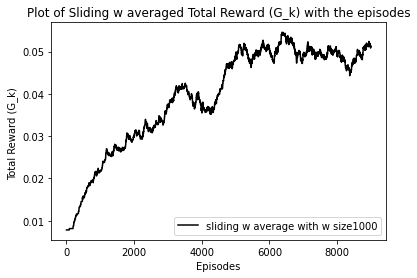

In [38]:
#_________________________________________________________________________________________________________________________________________________________
# 1.(b) Plot of G(k) 

window_size = 1000
average_update = []


for i in range(len(R) - window_size + 1):
    w = R[i:i+window_size]
    average = sum(w) / window_size
    average_update.append(average)

plt.plot(average_update, linestyle='solid', color='k', label=f'sliding w average with w size{window_size}')
plt.title('Averaged Total Reward (G_k) vs the episodes')
plt.ylabel('Total Reward (G_k) ')
plt.xlabel('Iterations')
plt.legend()
#_________________________________________________________________________________________________________________________________________________________

In [8]:
#_________________________________________________________________________________________________________________________________________________________
# 1(c) Q Value at the end of learning

print(f'Q-value at the end of learning is {Q}')
optimal_p = np.argmax(Q, axis=1)
print(f'Optimal policy at the end of learning is {optimal_p}')

#_________________________________________________________________________________________________________________________________________________________
#_________________________________________________________________________________________________________________________________________________________

The Q-value at the end of learning is [[0.07179245 0.06177776 0.06010163 0.05746471]
 [0.03808328 0.03298468 0.04322795 0.06006881]
 [0.07254488 0.05661668 0.06012639 0.05015289]
 [0.03988533 0.03158024 0.02184325 0.051056  ]
 [0.09631753 0.06935261 0.05782165 0.05119167]
 [0.         0.         0.         0.        ]
 [0.0853043  0.04636321 0.11390277 0.02099368]
 [0.         0.         0.         0.        ]
 [0.06830157 0.10573298 0.09881692 0.15109473]
 [0.12980345 0.25750182 0.15059405 0.122885  ]
 [0.30893875 0.15565778 0.19511568 0.08922991]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18907489 0.30034658 0.37387557 0.21002227]
 [0.39614223 0.63100502 0.54162701 0.47033621]
 [0.         0.         0.         0.        ]]
The optimal policy at the end of learning is [0 3 0 3 0 0 2 0 3 1 0 0 0 2 1 0]


In [12]:
#_________________________________________________________________________________________________________________________________________________________
# 2. BEHAVIOR POLICY
# 

e.reset()
Q = np.zeros((state_dim,action_dim))

R_b_pol = []
Q_array_b_pol = []
random_poly = np.random.randint(action_dim, size=(state_dim))

for i in range(1,iterations):
  state, info = e.reset()
  step = 0
  greedy_e = greedy_e_array[i]
  alpha = alpha_array[i]
  r_total = 0
  for step in range(max_step):
    if epsilon_action(greedy_e):
      action = random_poly[state]
    else:
      action = np.argmax(Q[state][:])
    next_state,reward,terminality,truncated,info = e.step(action)

    Q[state,action] = Q[state,action] + alpha*( reward + gamma*(np.max(Q[next_state,:])) - Q[state,action])
    r_total += math.pow(gamma,step)*reward
    state = next_state
    if terminality or truncated:
      break
  
  Q_array_b_pol.append(np.linalg.norm(Q - q_star))
  R_b_pol.append(r_total)
#_________________________________________________________________________________________________________________________________________________________


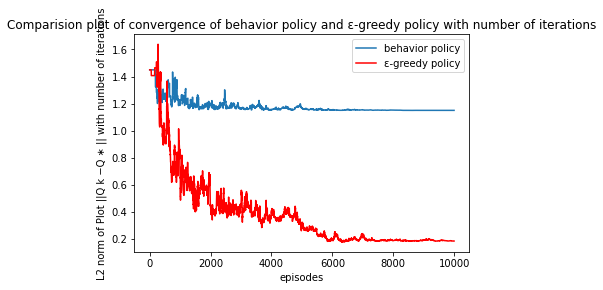

In [13]:
pi = np.argmax(Q, axis=1)
plt.plot(Q_array_b_pol, label='behavior policy')
plt.plot(Q_array, color='r', label='ε-greedy policy')
plt.xlabel('episodes')
plt.ylabel('L2 norm of Plot ||Q k −Q ∗ || with number of iterations')
plt.title("Comparision plot of convergence of behavior policy and ε-greedy policy with number of iterations")
plt.legend()

In [15]:
#_________________________________________________________________________________________________________________________________________________________
# BETTER BEHAVIOUR POLICY

e.reset()
Q = np.zeros((state_dim,action_dim))

R_bb_pol = []
Q_array_bb_pol = []
random_pi = np.random.randint(4, size=(16))

for i in range(1,iterations):
  state, info = e.reset()
  step = 0
  greedy_e = greedy_e_array[i]
  alpha = alpha_array[i]
  r_total = 0
  for step in range(max_step):
    if epsilon_action(greedy_e):
      action = random_pi[state]
    else:
      action = np.argmax(Q[state][:])
    next_state,reward,terminality,truncated,info = e.step(action)

    Q[state,action] = Q[state,action] + alpha*( reward + gamma*(np.max(Q[next_state,:])) - Q[state,action])
    r_total = r_total + math.pow(gamma,step)*reward
    state = next_state
    if terminality or truncated:
      break
  
  Q_array_bb_pol.append(np.linalg.norm(Q - q_star))
  R_bb_pol.append(r_total)

#_________________________________________________________________________________________________________________________________________________________

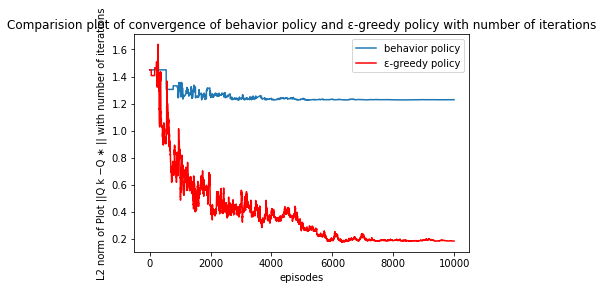

In [16]:
#_________________________________________________________________________________________________________________________________________________________
# PLOTS OF BEHAVIOR POLICY

plt.plot(Q_array_bb_pol, label='behavior policy')
plt.plot(Q_array, color='r', label='ε-greedy policy')
plt.xlabel('episodes')
plt.ylabel('L2 norm of Plot ||Q k −Q ∗ || with number of iterations')
plt.title("Comparision plot of convergence of behavior policy and ε-greedy policy with number of iterations")
plt.legend()

#_________________________________________________________________________________________________________________________________________________________

Using an ϵ-greedy exploration approach can help to converge faster than a uniformly random policy because it balances the trade-off between exploration and exploitation. However, when the behavior policy (action decision sampling policy) is different from the target policy, it may take an infinite number of episodes to converge to the optimal policy, and the behavior policy may converge to a suboptimal policy instead.

To strike a balance between exploration and exploitation, we can adjust the exploration probability. If we want to converge quickly, we can increase the exploration probability, but this may prevent us from getting too close to the optimal policy. On the other hand, if we want to get very close to the optimal policy, we can increase the exploitation probability, but this may decrease the convergence rate and require more episodes to converge.

It's important to note that when using an off-policy approach, where the data is generated by a different policy than the target policy, additional notation is required. Off-policy methods are often slower to converge and have greater variance, but they are more general and powerful. In the special case where the target and behavior policies are the same, the off-policy approach reduces to the optimal policy case.

To implement a better behavior policy, we can use a more informed policy that selects actions based on Q-values, such as a greedy policy that chooses the action with the highest Q-value in each state.







In [29]:
#_________________________________________________________________________________________________________________________________________________________
#_________________________________________________________________________________________________________________________________________________________
# 3. TD LEARNING
# 3.(a) Monte Carlo Learning

def MC_policy_eval(poly, gamma=0.9, iterations=10000):
    returns = {}
    for state in range(state_dim):
        returns[state] = []
    for i in range(iterations):
        state, info = e.reset()
        iter = []
        flag = False
        while not flag:
            action = poly[state]
            next_state, reward, flag, terminality, _ = e.step(action)
            iter.append((state, action, reward))
            state = next_state
        R = 0
        for t in range(len(iter)-1, -1, -1):
            state, a, r = iter[t]
            R = gamma * R + r
            if state not in [x[0] for x in iter[0:t]]:
                returns[state].append(R)
    V = np.zeros(state_dim)
    for state, G_k in returns.items():
        if len(G_k) > 0:
            V[state] = np.mean(G_k)
    return V

V = MC_policy_eval(policy)
V_random = policy_eval(random_policy)
print(f'Value of the optimal policy {policy} is {V}')
print(f'Value of the random policy {random_policy} is {V_random}')

#_________________________________________________________________________________________________________________________________________________________
# 3.(b) TD LEARNING

def TD_learning(poly):
    alpha = 0.1
    max_steps = 20
    V = np.zeros(state_dim)
    for i in range(iterations):
        state, info = e.reset()
        state = 0
        for step in range(max_steps):
            action = poly[state]
            next_state, reward, flag, terminality, info = e.step(action)
            V[state] = V[state] + alpha*(reward + gamma*V[next_state]-V[state])
            state = next_state
            if flag or terminality:
                break
            
    return V   

Td_v = TD_learning(policy)
Td_v_random = TD_learning(random_policy)
print(f'Value of the optimal policy {policy} is {Td_v}')
print(f'Value of the random policy {random_policy} is {Td_v_random}')

#_________________________________________________________________________________________________________________________________________________________
#_________________________________________________________________________________________________________________________________________________________

Value of the optimal policy [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0] is [0.06867688 0.05969238 0.06963469 0.         0.0910594  0.
 0.10487996 0.         0.14678777 0.24550865 0.29373094 0.
 0.         0.37645206 0.63282677 0.        ]
Value of the random policy [2 3 2 0 1 1 2 2 3 0 2 2 2 1 0 2] is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Value of the optimal policy [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0] is [0.05499617 0.05797666 0.0639645  0.         0.07241971 0.
 0.07450549 0.         0.12209557 0.1862735  0.22399125 0.
 0.         0.42323622 0.68074418 0.        ]
Value of the random policy [2 3 2 0 1 1 2 2 3 0 2 2 2 1 0 2] is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3.(c) Trade offs between TD and MC
TD-learning has a faster convergence rate compared to MC-learning because it updates the value function after each time step, whereas MC-learning updates the value function only after a full episode has completed. The suitability of each method depends on the specific problem, but TD-learning is generally more suitable for real-time applications where data is generated continuously, while MC-learning may be more suitable for batch learning settings.

TD-learning is an online learning method, while MC-learning is an offline method. This means that TD-learning can update the value function continuously, while MC-learning requires the completion of a full episode before updating the value function. TD-learning is therefore more memory-efficient than MC-learning since it only needs to store the current state and next state, while MC-learning needs to store the full episode history. This makes TD-learning more suitable for environments with long episodes.

MC-learning is typically more sample-efficient than TD-learning because it learns from complete episodes. TD-learning, on the other hand, uses partial information and may require more episodes to converge. However, TD-learning can learn from smaller data sets and may converge faster in environments with high variance.